### Observations and Insights 

* Capomulin appears to be the most viable drug regimen. It was demonstrated to have the largest impact on tumor volume reduction overall. It also had the greatest number of mice remaining at the end of the study.
* Ramicane was the only drug regimen that did not result in mouse deaths during the study.
* There is a very strong correlation between mouse weight and tumor volume. This may be because mouse weight may impact the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study.


In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# File paths of study datafiles
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the study results csv files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the datasets into a single dataframe
combined_results_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Find the number of unique mouse IDs in the dataframe

mouse_count_unique = len(combined_results_df["Mouse ID"].unique())
mouse_count_unique

249

In [6]:
# Find duplicate mice by ID number (only unique Mouse ID + Timepoint values)

duplicateRows_df = combined_results_df.loc[combined_results_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicateRows_df

array(['g989'], dtype=object)

In [7]:
# Find all rows for the duplicate mouse ID identified above 

g989 = combined_results_df.loc[combined_results_df['Mouse ID'] == "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a dataframe excluding the duplicate mouse ID
cleaned_results_df = combined_results_df[combined_results_df['Mouse ID'] != "g989"]
cleaned_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Verify that the duplicate nouse ID hasbeen removed
mouse_cleaned_unique = len(cleaned_results_df["Mouse ID"].unique())
mouse_cleaned_unique

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# filter the dataframe to show only Drug Regimen and Tumor Volume
summary_df = cleaned_results_df.groupby(['Drug Regimen'])

#group by Drug Regimen and calculate mean, median, variance, std dev, and std err
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_mean
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_median
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_var
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_std
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()
tumor_sem

summary_stats = pd.DataFrame({'Mean Tumor Vol': tumor_mean, 
                             'Median Tumor Vol': tumor_median,
                             'Tumor Vol Variance': tumor_var,
                             'Tumor Vol Std Dev': tumor_std,
                             'Tumor Vol Std Err': tumor_sem})
summary_stats

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Optional: Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

summary_stats = cleaned_results_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

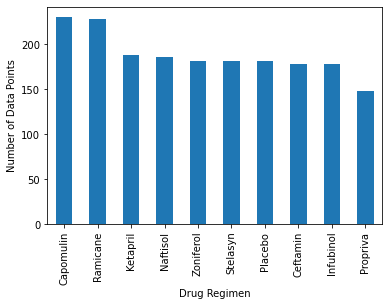

In [12]:
# Generate a pandas bar plot of the number of mice per time point for each treatment

treatmentRegimen = cleaned_results_df['Drug Regimen'].value_counts()
treatmentRegimen.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()


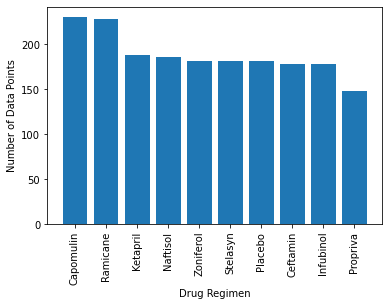

In [13]:
# Generate a pyplot bar plot showing the number of mice per time point for each treatment

treatmentRegimen = cleaned_results_df['Drug Regimen'].value_counts()
plt.bar(treatmentRegimen.index.values,treatmentRegimen.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

## Pie Plots

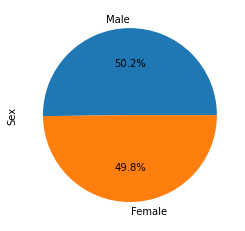

In [14]:
# Generate a pandas pie plot showing the distribution of male to female mice
sex_distribution = mouse_metadata.Sex.value_counts()
sex_distribution.plot(kind="pie",autopct='%1.1f%%')
plt.show()

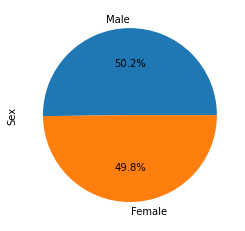

In [15]:
# Generate a pyplot pie plot showing the distribution of male to female mice
sex_distribution = mouse_metadata.Sex.value_counts()
sex_distribution
plt.pie(sex_distribution.values,labels=sex_distribution.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  

# find the final tumor volume for each mouse ID
ftv_df = cleaned_results_df.groupby(['Mouse ID']).max()
ftv_df = ftv_df.reset_index()

# Merge ftv_df with the cleaned dataframe from above to find the tumor vol at the last timepoint
merged_ftv = ftv_df[['Mouse ID','Timepoint']].merge(cleaned_results_df,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_ftv.loc[merged_ftv["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_ftv.loc[merged_ftv["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_ftv.loc[merged_ftv["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_ftv.loc[merged_ftv["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)'] 

In [17]:
# Quantitatively determine if there are any potential outliers for Capomulin 
cpmn_quartiles = capomulin.quantile([.25,.5,.75])
cpmn_lowerq = cpmn_quartiles[0.25]
cpmn_upperq = cpmn_quartiles[0.75]
cpmn_iqr = cpmn_upperq-cpmn_lowerq
cpmn_lower_bound = cpmn_lowerq - (1.5*cpmn_iqr)
cpmn_upper_bound = cpmn_upperq + (1.5*cpmn_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cpmn_lower_bound) | (capomulin > cpmn_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [18]:
# Quantitatively determine if there are any potential outliers for Ramicane 
rmcn_quartiles = ramicane.quantile([.25,.5,.75])
rmcn_lowerq = rmcn_quartiles[0.25]
rmcn_upperq = rmcn_quartiles[0.75]
rmcn_iqr = rmcn_upperq-rmcn_lowerq
rmcn_lower_bound = rmcn_lowerq - (1.5*rmcn_iqr)
rmcn_upper_bound = rmcn_upperq + (1.5*rmcn_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < rmcn_lower_bound) | (ramicane > rmcn_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [19]:
# Quantitatively determine if there are any potential outliers for Infubinol 
infb_quartiles = infubinol.quantile([.25,.5,.75])
infb_lowerq = infb_quartiles[0.25]
infb_upperq = infb_quartiles[0.75]
infb_iqr = infb_upperq-infb_lowerq
infb_lower_bound = infb_lowerq - (1.5*infb_iqr)
infb_upper_bound = infb_upperq + (1.5*infb_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < infb_lower_bound) | (infubinol > infb_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [20]:
# Quantitatively determine if there are any potential outliers for Ceftamin 
cftm_quartiles = ceftamin.quantile([.25,.5,.75])
cftm_lowerq = cftm_quartiles[0.25]
cftm_upperq = cftm_quartiles[0.75]
cftm_iqr = cftm_upperq-cftm_lowerq
cftm_lower_bound = cftm_lowerq - (1.5*cftm_iqr)
cftm_upper_bound = cftm_upperq + (1.5*cftm_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cftm_lower_bound) | (ceftamin > cftm_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


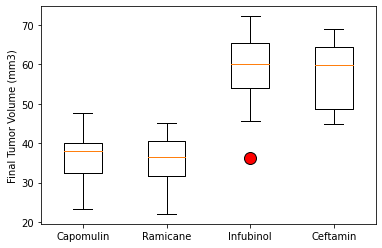

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#filter dataframe by
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

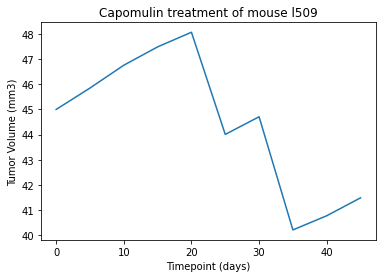

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = cleaned_results_df.loc[cleaned_results_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


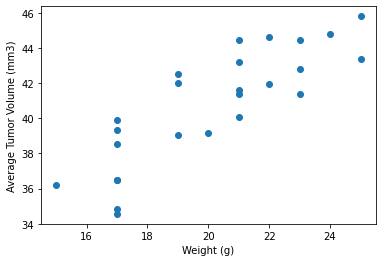

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = cleaned_results_df.loc[cleaned_results_df['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


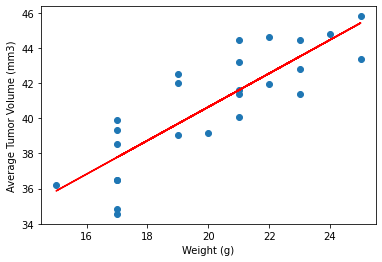

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
